# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

## 1. Reading and understanding the Data

In [2]:
# Loading the data using Pandas
lead_score=pd.read_csv('Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the Dataset

In [3]:
#Checking the shape of dataset 
lead_score.shape

(9240, 37)

In [4]:
#Basic Data check
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking description of the numerical data in the DataFrame
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2.EDA

### Data Cleaning

In [6]:
# Checking for if any duplicate value present in 'Prospect ID' and Lead Number coulumn.
print(lead_score.duplicated(subset = ['Prospect ID'], keep = False).sum())
print(lead_score.duplicated(subset = ['Lead Number'], keep = False).sum())

0
0


In [7]:
# Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & so one of column can be dropped.
lead_score.drop(['Lead Number'], axis=1, inplace=True)       

In [8]:
# Replacing 'Select' value with NaN (Since it means no option is selected)

lead_score=lead_score.replace('Select',np.nan)

### Checking and handling missing values

In [9]:
# checking null values in each rows
lead_score.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [10]:
# checking percentage of null values in each column.
round((lead_score.isnull().sum())/len(lead_score.index)*100,2)


Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# dropping columns with more than 45% missing values.
cols=lead_score.columns

for i in cols:
        if((100*(lead_score[i].isnull().sum()/len(lead_score.index))) >= 40):
            lead_score.drop(i,1,inplace=True)

In [12]:
# Rechecking the percentage of missing values.
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Data Visualization

#### Analayzing and Imputing missing value

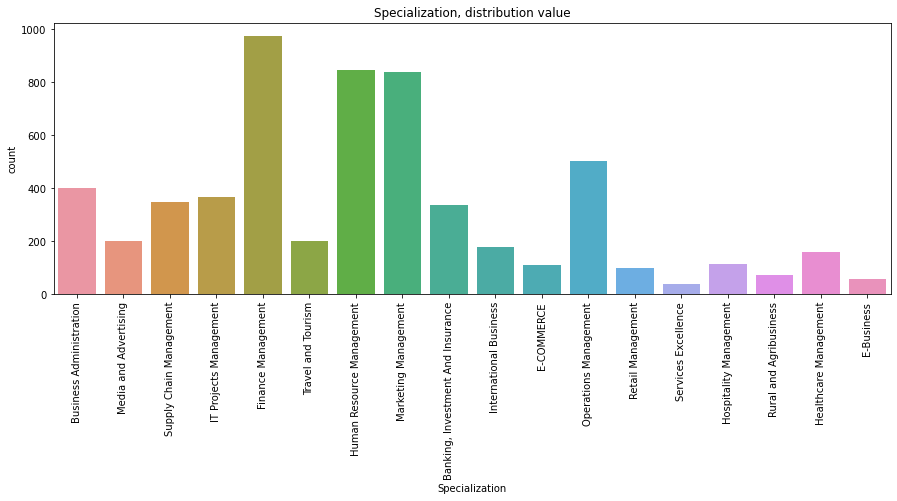

In [13]:
# Column: 'Specialization' has 37% missing values
plt.figure(figsize=(15,5))
plt.title('Specialization, distribution value')
sns.countplot(lead_score['Specialization'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**The lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this missing value.**

In [14]:
# Imputing the missing value of specialization column with 'others value'.
lead_score['Specialization']=lead_score['Specialization'].replace(np.nan,'Others')

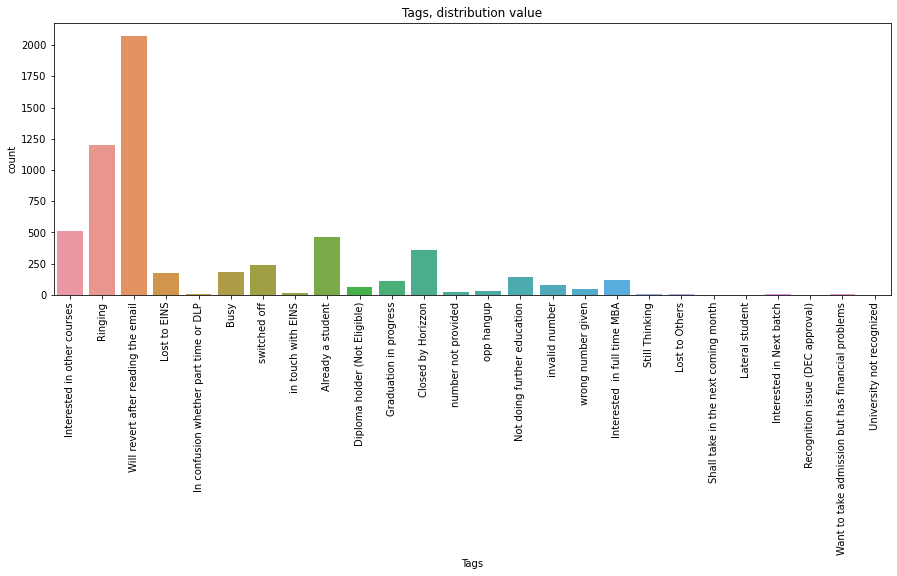

In [15]:
# Column: 'Tags' has 36% missing values
plt.figure(figsize=(15,5))
plt.title('Tags, distribution value')
sns.countplot(lead_score['Tags'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**Since most values are 'Will revert after reading the email', So we can impute missing values in this column with this value.**

In [16]:
# Imputing the missing data in the tags column with 'Will revert after reading the email' value
lead_score['Tags']=lead_score['Tags'].replace(np.nan,'Will revert after reading the email')

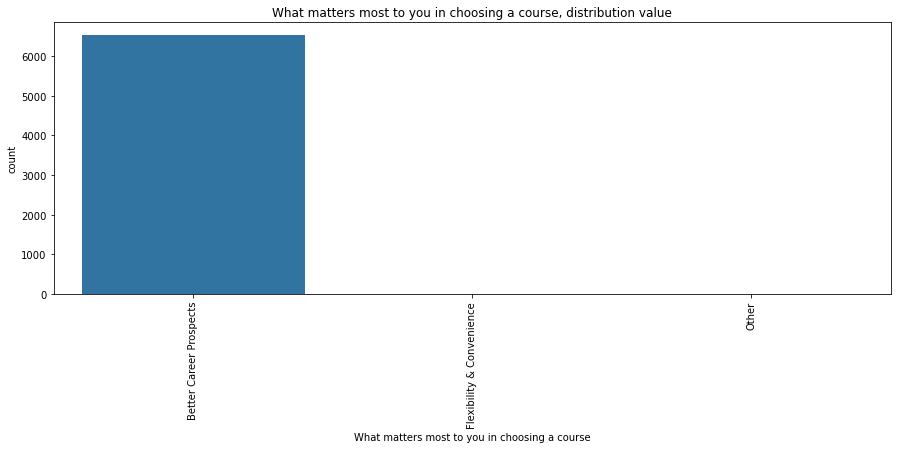

In [17]:
# Column: 'What matters most to you in choosing a course', this column has 29% missing values.
plt.figure(figsize=(15,5))
plt.title('What matters most to you in choosing a course, distribution value')
sns.countplot(lead_score['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**We can see that this is highly skewed column so we can remove this column.**

In [18]:
# Dropping 'What matters most to you in choosing a course' column. 
lead_score=lead_score.drop('What matters most to you in choosing a course',axis=1)

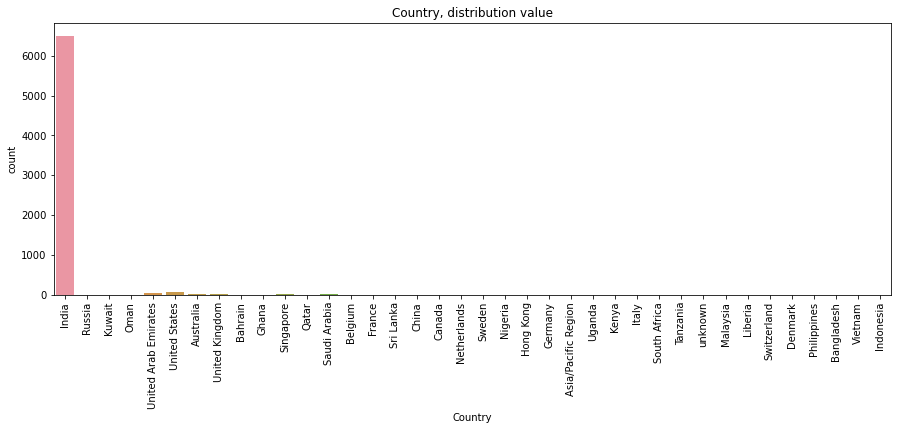

In [19]:
# Column: 'Country' column has 27% missing values.
plt.figure(figsize=(15,5))
plt.title('Country, distribution value')
sns.countplot(lead_score['Country'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**From graph we can see most values are 'India' , we can impute missing values in this column with this value.**

In [20]:
# Imputing the missing value in the 'Country' column with 'India'
lead_score['Country']=lead_score['Country'].replace(np.nan,'India')

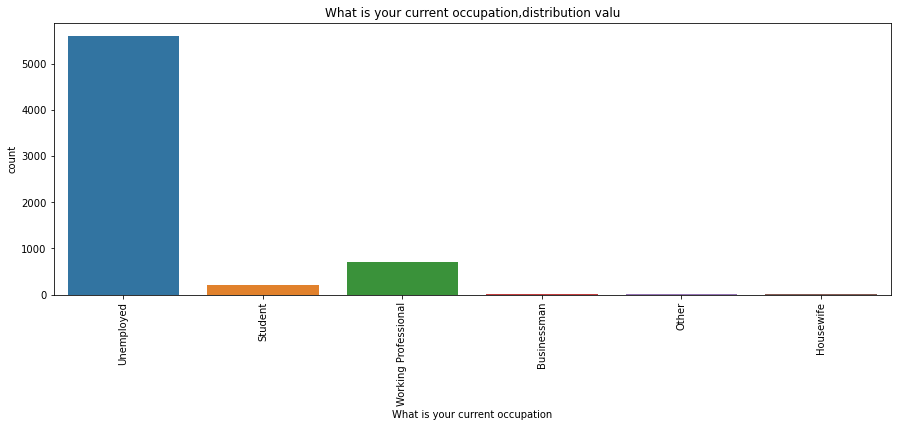

In [21]:
# Column: 'What is your current occupation' column has 29% missing values.
plt.figure(figsize=(15,5))
plt.title('What is your current occupation,distribution valu')
sns.countplot(lead_score['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**From graph we can see, the most values are 'Unemployed' , we can impute missing values in this column with this value.**

In [22]:
# Imputing the missing value in the 'What is your current occupation' column with 'Unemployed'.
lead_score['What is your current occupation']=lead_score['What is your current occupation'].replace(np.nan,'Unemployed')

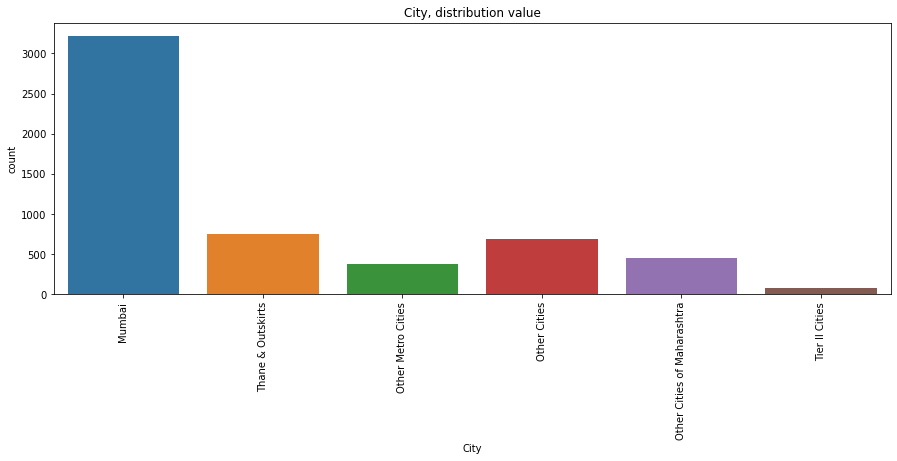

In [23]:
# Column: 'City' column has 40% missing values
plt.figure(figsize=(15,5))
plt.title('City, distribution value')
sns.countplot(lead_score['City'])
plt.xticks(rotation=90)
plt.show()

### `Observation:`
**From graph we can see most values are 'Mumbai', we can impute missing values in this column with this value.**

In [24]:
# Imputing the missing value in the 'City' column with 'Mumbai'.
lead_score['City']=lead_score['City'].replace(np.nan,'Mumbai')

In [25]:
# Again checking percenatge of null value exist in record.
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [26]:
# Checking the percent of lose if the null values are removed
round(100*(sum(lead_score.isnull().sum(axis=1) > 1)/lead_score.shape[0]),2)

1.48

In [27]:
# Rest missing values are under 2% so we can drop these rows which contain null values
lead_score.dropna(inplace = True)

In [28]:
# Finding the null percentages across columns after removing the rest null value
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

Now we don't have any missing value in the dataset. 

In [29]:
# Checking the percentage of rows retained 
(len(lead_score.index)/9240)*100

98.2034632034632

### `Observation:` 
**We have retained 98% of the rows after cleaning the data.**

In [30]:
# Checking for duplicate record in our dataset.

lead_score[lead_score.duplicated()]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [31]:
# Checking lead conversion rate using target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

### Performing Univariate Analysis For Categorical Variables

Distribution view for column Lead Origin


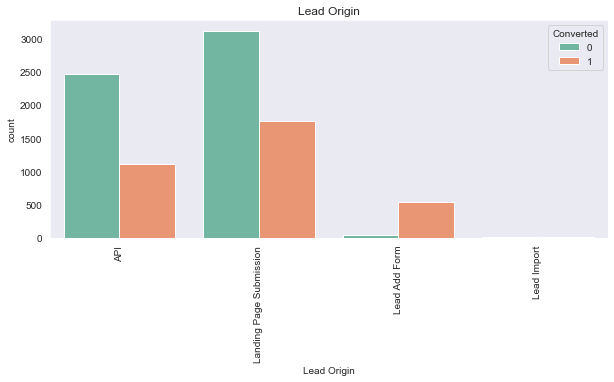

Distribution view for column Lead Source


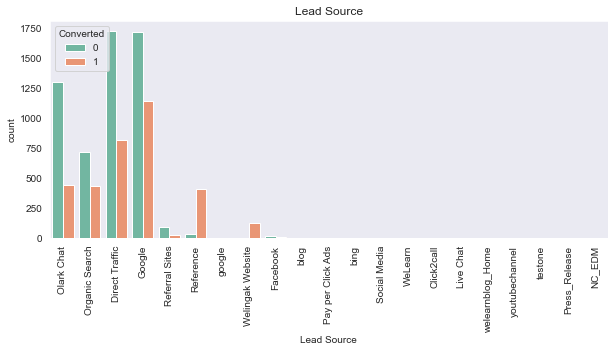

Distribution view for column Do Not Email


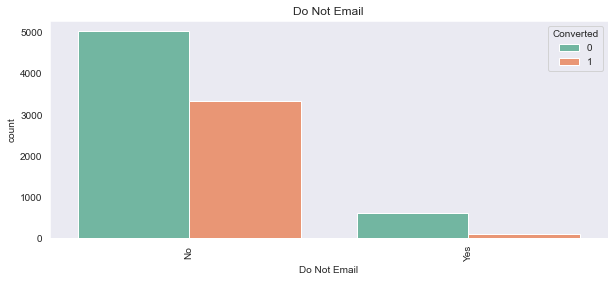

Distribution view for column Do Not Call


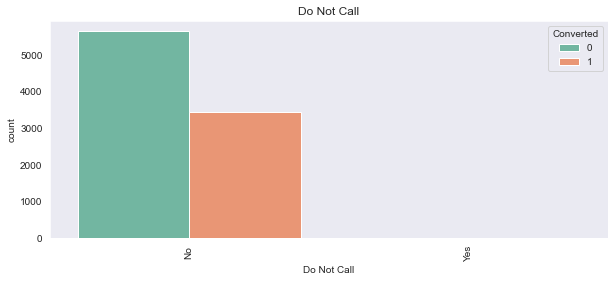

Distribution view for column Last Activity


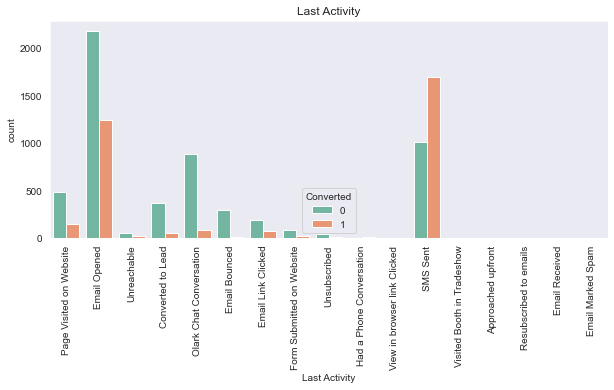

Distribution view for column Country


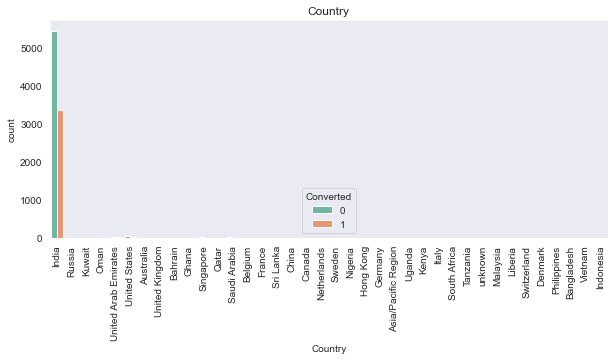

Distribution view for column Specialization


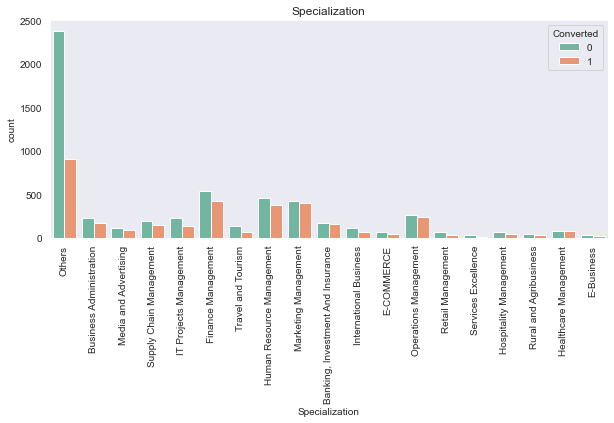

Distribution view for column What is your current occupation


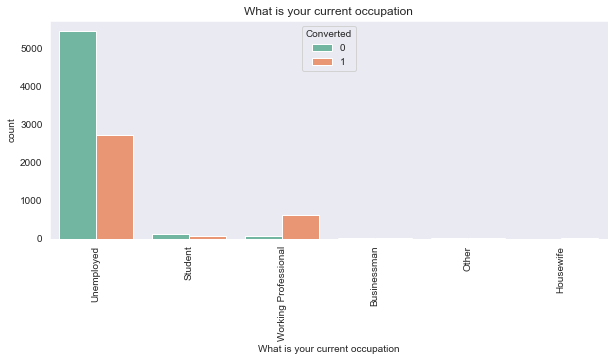

Distribution view for column Search


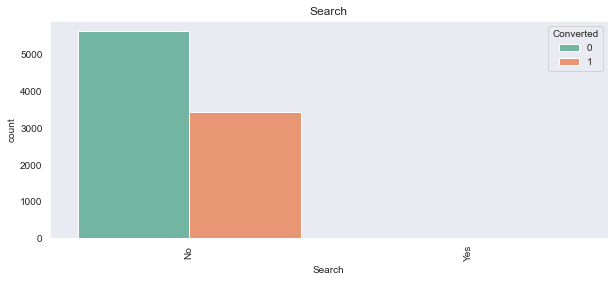

Distribution view for column Magazine


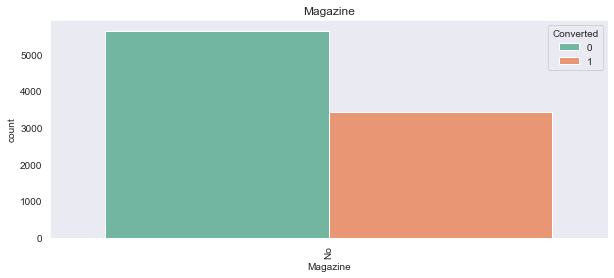

Distribution view for column Newspaper Article


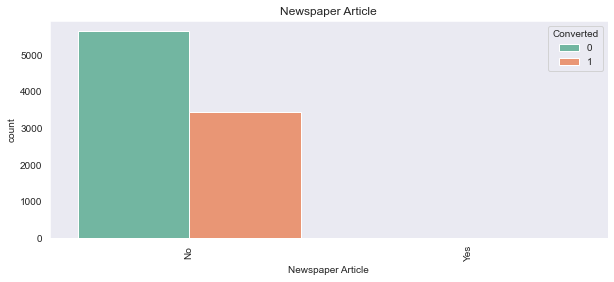

Distribution view for column X Education Forums


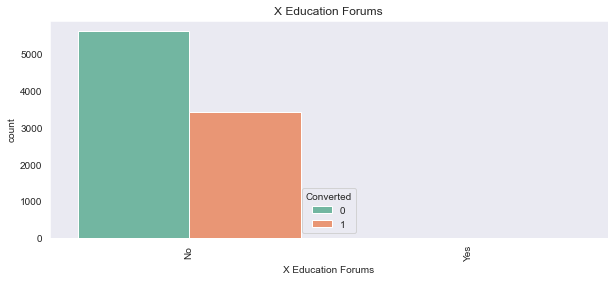

Distribution view for column Newspaper


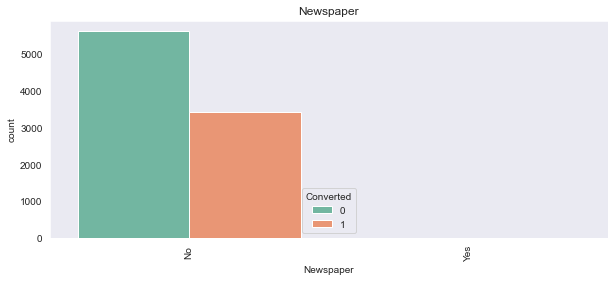

Distribution view for column Digital Advertisement


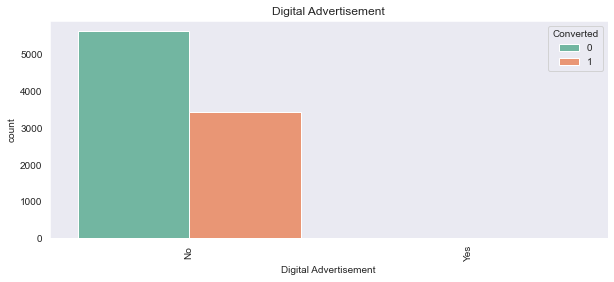

Distribution view for column Through Recommendations


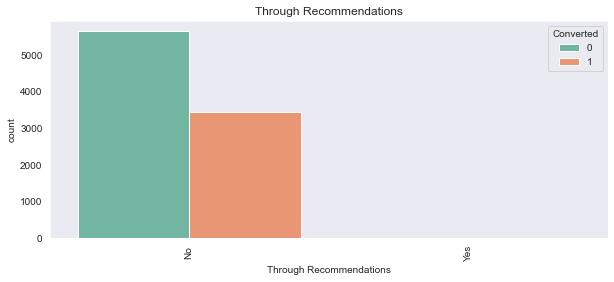

Distribution view for column Receive More Updates About Our Courses


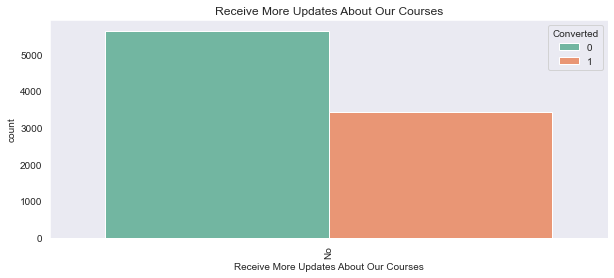

Distribution view for column Tags


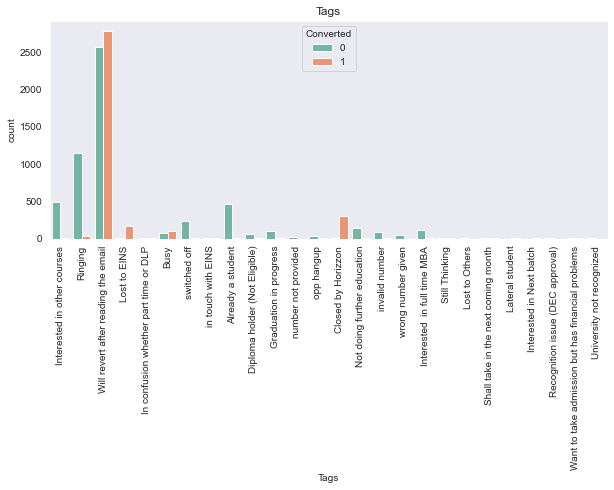

Distribution view for column Update me on Supply Chain Content


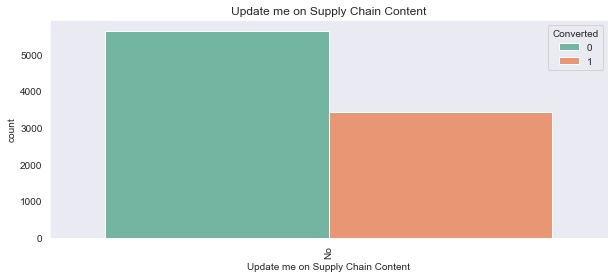

Distribution view for column Get updates on DM Content


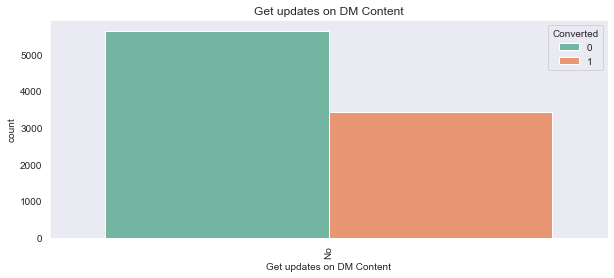

Distribution view for column City


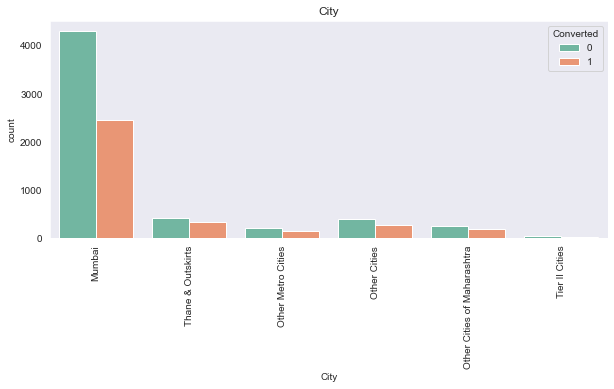

Distribution view for column I agree to pay the amount through cheque


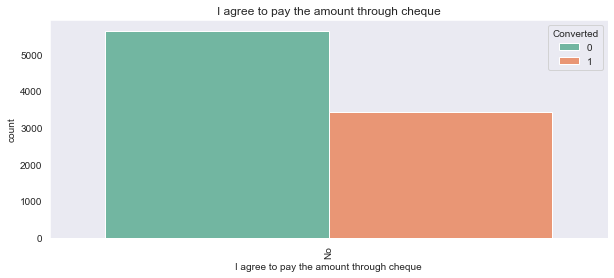

Distribution view for column A free copy of Mastering The Interview


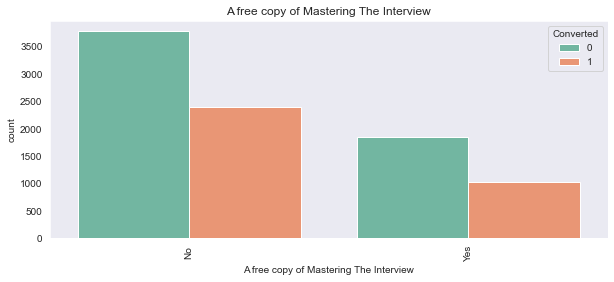

Distribution view for column Last Notable Activity


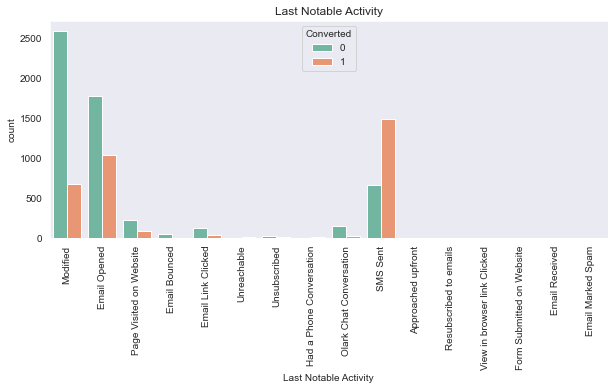

In [32]:
# Considering 23 Categoriccal column for univariate analysis.
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation',
          'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content',
          'Get updates on DM Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
          'Last Notable Activity']

for i in cat_cols:
    print('Distribution view for column',i)
    plt.figure(figsize=(10,4))
    sns.set_style('dark')
    
    plt.title(f'{i}')
    sns.countplot(lead_score[i], hue=lead_score['Converted'],palette='Set2')
    plt.xticks(rotation=90)
    plt.show()
    
    

### `Observation and Insight from above graph listed colunm wise`: 

**`Lead Origin:`** To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

**`Lead Source:`** Need to focus on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

**`Do not Email, Do not Email:`** Most entries are 'No'. No Inference can be drawn with this parameter.

**`Last Activity:`** Most of the lead have their Email opened as their last activity and Conversion rate for leads with last activity as SMS Sent is almost 60%.

**`Country:`** Most values are 'India', no other inference can be drawn.

**`Specialization:`** Focus should be more on the Specialization with high conversion rate.

**`What is your current occupation:`** Working Professionals going for the course have high chances of joining it and Unemployed leads are the most in numbers but has around 30-35% conversion rate.

**`Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations, Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity:`** Most entries of these columns are 'No'. So no Inference can be drawn with this parameter.



Distribution view for column Last Activity


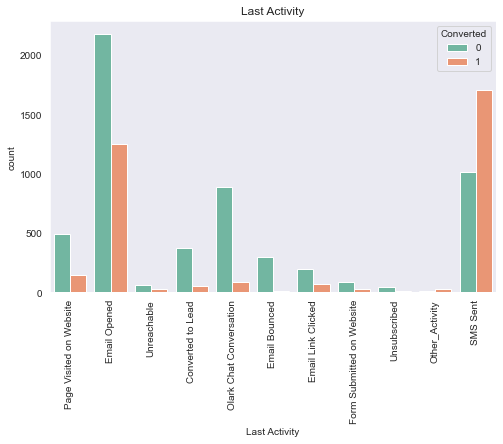

Distribution view for column Lead Source


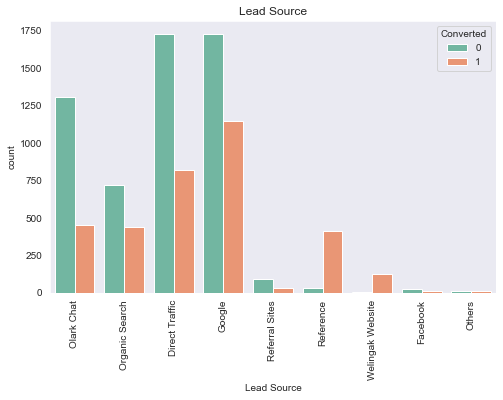

In [33]:
# From above graph inference, Lead Soucre & Last Activitiy column has duplicate & multiple subcatagoreis with less value,
# So clubing the value to better understand the trend.

# Need to replace 'google' with 'Google'
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['google'], 'Google')
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

# We can club the last activities to "Other_Activity" which are having less data.
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')
# Visualizing again
cat_cols1=['Last Activity','Lead Source']
for i in cat_cols1:
    print('Distribution view for column',i)
    plt.figure(figsize=(8,5))
    sns.set_style('dark')
    plt.title(f'{i}')
    sns.countplot(lead_score[i], hue=lead_score['Converted'],palette='Set2')
    plt.xticks(rotation=90)
    plt.show()

### Performing Univariate and Bivariate Analysis For Numerical Variables

In [34]:
# Checking percentiles values for numeric column
lead = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


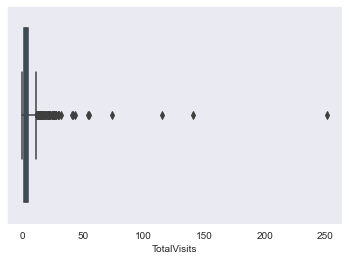

In [35]:
#Plotting box plot for 'TotalVisits' to check outliers.
sns.boxplot(lead_score['TotalVisits'])
plt.show()

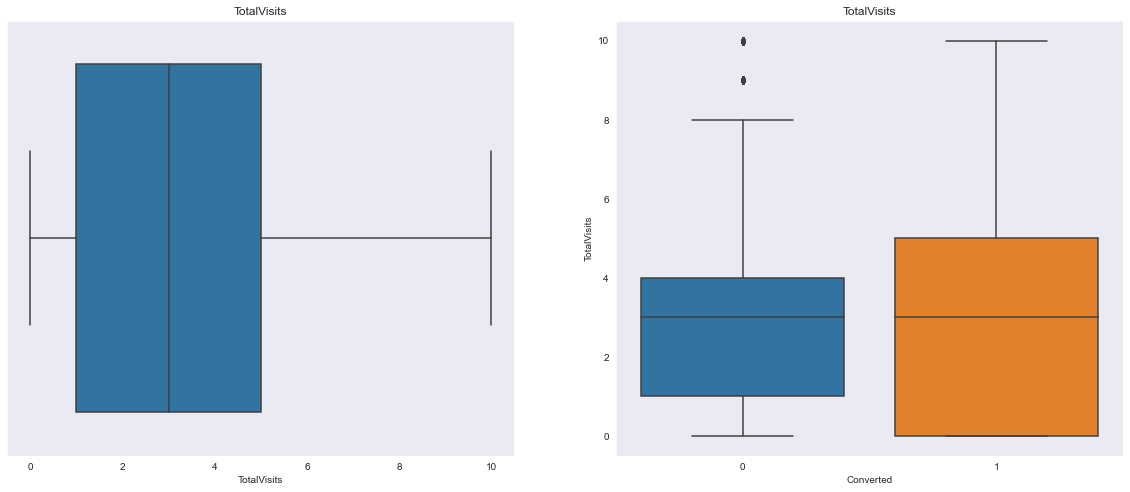

In [36]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
percentiles = lead_score['TotalVisits'].quantile([0.05,0.95]).values
lead_score['TotalVisits'][lead_score['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_score['TotalVisits'][lead_score['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Visualizing again after capin the outlier value
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(lead_score['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1,2,2)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)
plt.title('TotalVisits')
plt.show()

### `Observation:` 

**`TotalVisits:`** Median for converted and not converted leads are the same.So nothing can be concluded on the basis of Total Visits.

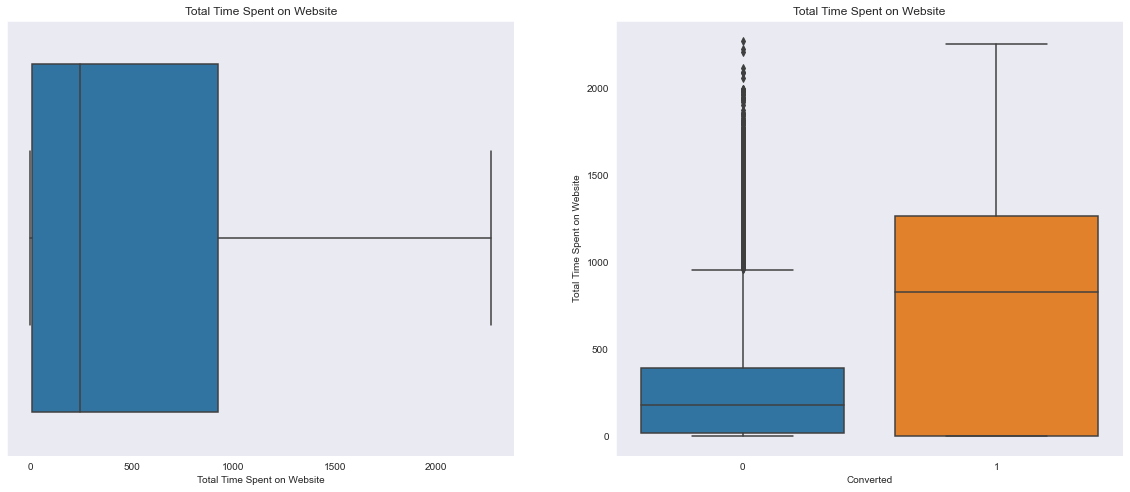

In [37]:
# Plotting box plot for 'Total Time Spent on Website' to check outliers.

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(lead_score['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score)
plt.title('Total Time Spent on Website')
plt.show()

### `Observation:` 

**`Total Time Spent on Website:`** Leads spending more time on the weblise are more likely to be converted, website should be made more engaging to make leads spend more time.

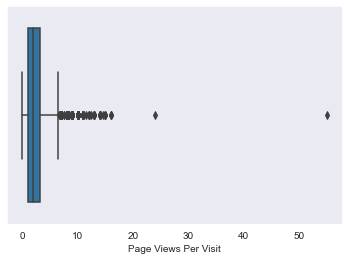

In [38]:
# Plotting box plot for 'Page Views Per Visit' to check outliers.
sns.boxplot(lead_score['Page Views Per Visit'])
plt.show()

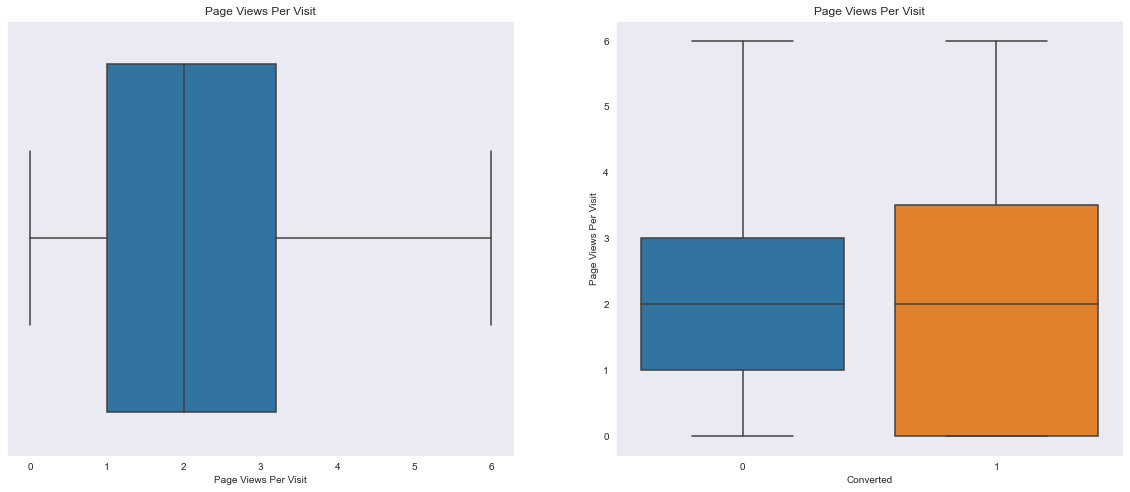

In [39]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
percentiles = lead_score['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#Visualizing again after capin the outlier value
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(lead_score['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(1,2,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_score)
plt.title('Page Views Per Visit')
plt.show()

### `Observation:`

**`Page Views Per Visit:`** Median for converted and unconverted leads is the same.So nothing can be said specifically for lead conversion from Page Views Per Visit

## `Final Observation:`

**Based on the univariate and Bivariate analysis we have seen that many columns are not adding any much information to the model, hence we can drop them for further analysis and to take better decision**


In [40]:
# Droping redundant coulmns 
lead_score = lead_score.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)


In [41]:
# Checking the shape of dataset after removing cloumn.
lead_score.shape

(9074, 14)

In [42]:
# Listing all feature for further analysis.
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# 3.Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [43]:
varlist=['Do Not Email','Do Not Call']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

lead_score[varlist]=lead_score[varlist].apply(binary_map)
lead_score['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

### Creating dummy variables for all categorical columns with multiple levels

In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_df = pd.get_dummies(lead_score[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# Concatenating the dummy_df to the lead_score dataframe.
lead_score=pd.concat([lead_score, dummy_df], axis=1)
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### We have created dummies for the below variables, so we can drop them

In [46]:
# Dropping the repeated variables,for which dummies were created.

lead_score=lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis=1)
lead_score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# 4.Splitting the data into  train and test set.

In [47]:
# Importing the required library.
from sklearn.model_selection import train_test_split

In [48]:
# Putting feature variable to X.

X=lead_score.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Putting the target variable in y.
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Split the dataset into 70% and 30% for train and test respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Re-scaling the features

In [51]:
# Import Standard scaler.
from sklearn.preprocessing import StandardScaler

# Scale the three numeric features.
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


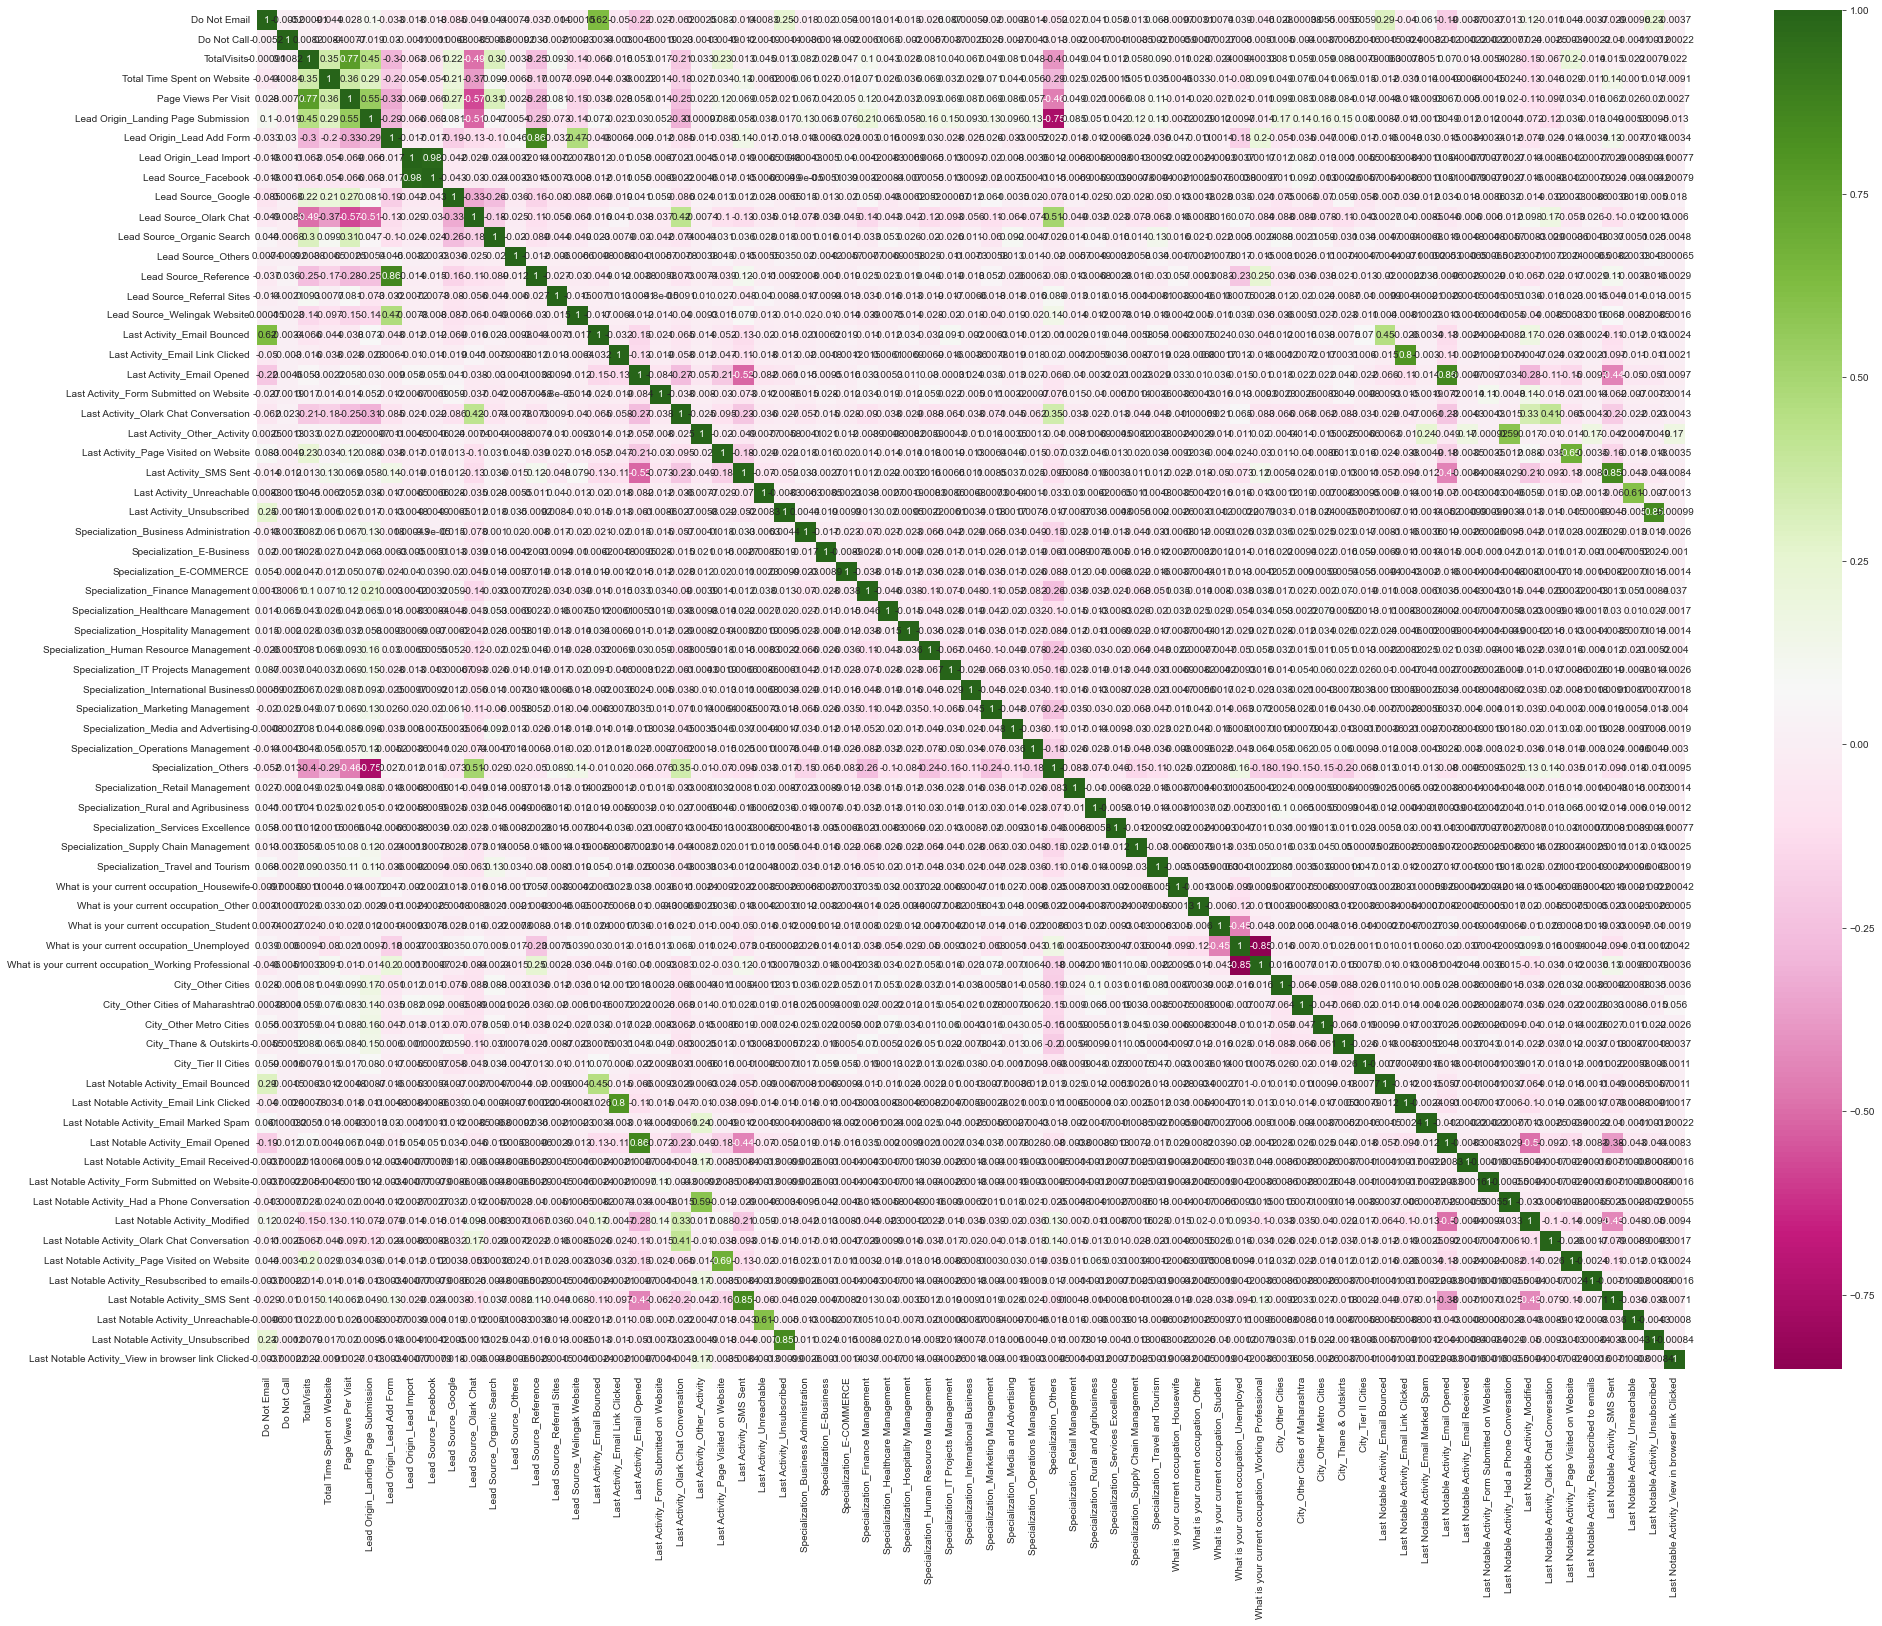

In [52]:
# To check the correlation among varibles.
plt.figure(figsize=(32,25))
sns.heatmap(X_train.corr(),annot = True,cmap="PiYG")
plt.show()

### **`Observation:`**
Since there are a lot of variables it is difficult to drop variable. We'll import RFE for feature selection.

#  5.Model Building 

### Feature Selection Using RFE

In [53]:
# Import 'LogisticRegression'.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE.
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)    # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [55]:
# Features that have been selected by RFE.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

In [56]:
# Put all the columns selected by RFE in the variable 'col'.
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model-1

In [57]:
# Assessing the model with StatsModels.
import statsmodels.api as sm

# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 24 Jan 2023   Deviance:                       5180.6
Time:                        16:36:21   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

### **`Observation:`**
**From above above model-1 summary we can see P-value for 'What is your current occupation_Housewife' variable is more than 0.05, So we can drop this column.**

In [58]:
# Dropping the column 'What is your current occupation_Housewife'.
col = col.drop('What is your current occupation_Housewife')

## Model-2

In [59]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 24 Jan 2023   Deviance:                       5184.5
Time:                        16:36:21   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

### **`Observation:`**
**From above model-2 summary we can see P-value for 'Last Notable Activity_Had a Phone Conversation' variable is more than 0.05, So we can drop this column.**

In [60]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation'.
col = col.drop('Last Notable Activity_Had a Phone Conversation')

## Model-3

In [61]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 24 Jan 2023   Deviance:                       5186.1
Time:                        16:36:22   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

### **`Observation:`**
**From above model-3 summary we can see P-value for 'What is your current occupation_Student' variable is more than 0.05, So we can drop this column.**

In [62]:
# Dropping the column 'What is your current occupation_Student'.
col = col.drop('What is your current occupation_Student')

## Model-4

In [63]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 24 Jan 2023   Deviance:                       5189.0
Time:                        16:36:22   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

### **`Observation:`**
**From above model-4 summary we can see P-value for 'Lead Origin_Lead Add Form' variable is more than 0.05, So we can drop this column.**

In [64]:
# Dropping the column 'Lead Origin_Lead Add Form'.
col = col.drop('Lead Origin_Lead Add Form')

## Model-5

In [65]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 24 Jan 2023   Deviance:                       5192.3
Time:                        16:36:22   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

### **`Observation:`**
**From above model-5 summary we can see P-value for 'Lead Origin_Lead Import' variable is more than 0.05, So we can drop this column.**

In [66]:
# Dropping the column 'Lead Origin_Lead Import'.
col = col.drop('Lead Origin_Lead Import')

## Model-6

In [67]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.7
Date:                Tue, 24 Jan 2023   Deviance:                       5195.5
Time:                        16:36:22   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4926      0.239      2.058      0.040       0.024       0.962
Do Not Email                                            -1.6821      0.191     -8.827      0.000      -2.056      -1.309
Total Time Spent on Website                              1.0975      0.040     27.191      0.000       1.018       1.177
Lead Origin_Landing Page Submission                     -1.1824      0.128     -9.266      0.000      -1.432      -0.932
Lead Source_Olark Chat                                   1.0855      0.123      8.857      0.000       0.845       1.326
Lead Source_Reference                                    3.3281      0.242     13.744      0.000       2.853       3.803
Lead Source_Welingak Website                             5.8665      0.729      8.042      0.000       4.437       7.296
Last Activity_Olark Chat Conversation                   -0.9572      0.172     -5.575      0.000      -1.294      -0.621
Last Activity_Other_Activity                             2.2163      0.462      4.792      0.000       1.310       3.123
Last Activity_SMS Sent                                   1.3399      0.076     17.708      0.000       1.192       1.488
Last Activity_Unsubscribed                               1.4034      0.482      2.910      0.004       0.458       2.348
Specialization_Others                                   -1.1865      0.125     -9.455      0.000      -1.432      -0.941
What is your current occupation_Unemployed              -0.5924      0.213     -2.781      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0329      0.283      7.178      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8747      0.081    -10.743      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5623      0.475      3.287      0.001       0.631       2.494
========================================================================================================================
"""

### **`Observation:`**
- **From above model-6, according to the pvalues, all the variables are significant. So Now will calculate VIF of the variables to find if any multicollinearity exists betweeen any variable.**

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,9.56
2,Lead Origin_Landing Page Submission,5.67
10,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
13,Last Notable Activity_Modified,1.86
12,What is your current occupation_Working Profes...,1.64
8,Last Activity_SMS Sent,1.63
6,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


### **`Observation:`**
- #### From above VIF table we can see VIF value for the variable 'What is your current occupation_Unemployed' is high so we are going to drop spring variable.

In [69]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF.
col = col.drop('What is your current occupation_Unemployed')

## Model-7

In [70]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 24 Jan 2023   Deviance:                       5203.0
Time:                        16:36:22   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

### **`Observation:`**
- **From above model-7, according to the pvalues, all the variables are significant. So Now will calculate VIF of the variables to find if any multicollinearity exists betweeen any variable.**

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [72]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col = col.drop('Last Activity_Unsubscribed')

## Model-8

In [73]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 24 Jan 2023   Deviance:                       5210.2
Time:                        16:36:23   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [75]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables.
col = col.drop('Last Notable Activity_Unreachable')

## Model-9

In [76]:
# Adding a constant variable.
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
# Looking at the summary of our linear model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 24 Jan 2023   Deviance:                       5221.0
Time:                        16:36:23   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


### **`Observation:`**
**From the above model-9 ,we can see that, All the 12 features are statistically significant, has low VIF and p-value.So we consider Model-9 is our Final Model.**

# 6.Making Prediction on the Train set

In [78]:
# Getting the predicted values on the train set.
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [79]:
# Reshaping into an array.
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

**Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

In [81]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


### Making the Confusion matrix

In [82]:
# Importing metrics from sklearn for evaluation.
from sklearn import metrics

# Creating confusion matrix.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


In [83]:
# The confusion matrix indicates as below.
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [84]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


### Metrics beyond simply accuracy

In [85]:
TP = confusion[1,1] # Substituting the value of true positive
TN = confusion[0,0] # Substituting the value of true negatives
FP = confusion[0,1] # Substituting the value of false positives
FN = confusion[1,0] # Substituting the value of false negatives

In [86]:
# Sensitivity of our logistic regression model.
print("Sensitivity : ",TP / float(TP+FN))

# Specificity of our logistic regression model.
print("Specificity : ",TN / float(TN+FP))

Sensitivity :  0.7060506950122649
Specificity :  0.8862996158770806


In [87]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted.
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

False Positive Rate : 0.11370038412291933
Positive Predictive Value : 0.7954859511745739
Negative predictive value : 0.8279904306220096


### `Observation:`
- **We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care.**
- **We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.**

### Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [88]:
# The previous cut off was randomely selected. Now to find the optimum one.
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

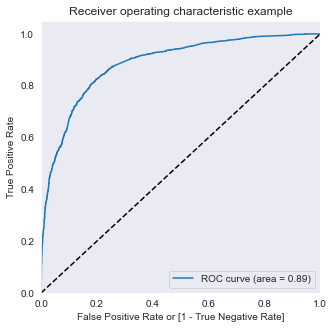

In [90]:
# Call the ROC function.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**The area under ROC curve is 0.89 which is a very good value.**

### Finding Optimal Cutoff Point

**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [92]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.586049,0.973426,0.343406
0.2,0.2,0.748386,0.916599,0.643022
0.3,0.3,0.801449,0.849959,0.771063
0.4,0.4,0.816564,0.772690,0.844046
0.5,0.5,0.816879,0.706051,0.886300
0.6,0.6,0.797040,0.600572,0.920102
0.7,0.7,0.786963,0.531889,0.946735
0.8,0.8,0.761297,0.424775,0.972087
0.9,0.9,0.720831,0.294767,0.987708


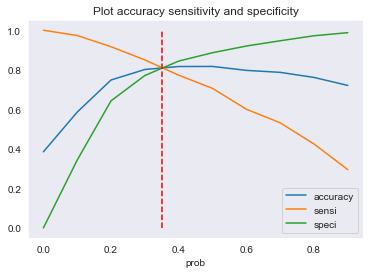

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Plot accuracy sensitivity and specificity')
plt.vlines(x=0.35,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

**From the graph it is visible that the optimal cut off is at 0.35.**

In [94]:
# Creating final_predicted column with threshold value 0.35.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Train data

In [95]:
# Adding lead score column
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


In [96]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8135726657219335


In [97]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3183,  722],
       [ 462, 1984]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Sensitivity :  0.8111201962387572
Specificity : 0.8151088348271447


In [100]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

False Positive rate :  0.1848911651728553
Positive Predictive Value : 0.7331855136733185
Negative Predictive Value :  0.8732510288065843


### Precision and Recall

* **Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.**
* **Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.**

In [101]:
# Looking at the confusion matrix again.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]], dtype=int64)

In [102]:
# Precision.
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall.
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.7954859511745739
Recall : 0.7060506950122649


In [103]:
# Using sklearn utilities for the same.
from sklearn.metrics import precision_score, recall_score

print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7954859511745739
Recall : 0.7060506950122649


### Precision and recall tradeoff

In [104]:
# Importing precision-recall package.
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

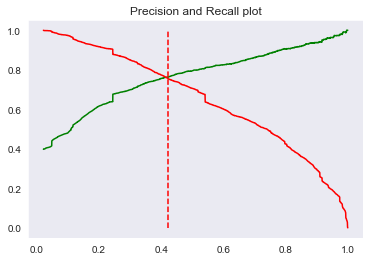

In [106]:
# plotting a trade-off curve between precision and recall.
plt.title('Precision and Recall plot')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

### **`Observation:`**
**The above graph shows the trade-off between the Precision and Recall**

# 7.Making predictions on the test set

In [107]:
# Scaling the test data.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [108]:
# Assigning the columns selected by the final model to the X_test.
X_test=X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [109]:
# Adding a constant to X_test.
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set.
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [110]:
# Converting y_test_pred to a dataframe which is an array.
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [111]:
# Converting y_test to dataframe.
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index.
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side .
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1.
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [112]:
# Renaming the column.
y_pred_final=y_pred_final.rename(columns={0:'Converted_prob'})

In [113]:
# Rearranging the columns.
y_pred_final=y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [114]:
# Making prediction using cut off 0.35.
y_pred_final['Final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [115]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted))

Accuracy : 0.8082996694821888


In [116]:
# Making the confusion matrix.
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion2

array([[1409,  325],
       [ 197,  792]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model.
print("Sensitivity :",TP / float(TP+FN))

# Let us calculate specificity.
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8008088978766431
Specificity : 0.8125720876585929


### Assigning Lead Score to the Test data

In [119]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


# 8.Model Evaluation

### A. Comparing the values obtained from both Train & Test set data:

### `Train Data:` 

* **Accuracy : 81.3 %**
* **Sensitivity : 81.1 %**
* **Specificity : 81.5 %**

### `Test Data:` 

* **Accuracy : 80.8 %**
* **Sensitivity : 80.0 %**
* **Specificity : 81.2 %**

## `Conclusion :`
**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

### B. Finding out the leads which should be contacted:

**The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Leads'.**

In [120]:
hot_leads = y_pred_final.loc[y_pred_final['Lead_Score']>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,Final_predicted,Lead_Score
1,1490,1,0.969057,1,97
3,4216,1,0.802999,1,80
8,4223,1,0.916621,1,92
16,1946,1,0.924467,1,92
21,2461,1,0.992551,1,99
...,...,...,...,...,...
2694,1566,1,0.947723,1,95
2699,6461,1,0.961562,1,96
2703,5741,1,0.908283,1,91
2715,6299,1,0.871977,1,87


### `Insight:`
**So there are 457 leads which can be contacted and have a high chance of getting converted.**

In [121]:
#Therefore the following Prospect ID of the customers to be contacted are :

hot_leads_id = hot_leads['Prospect ID'].values.reshape(-1)
hot_leads_id

array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 4959, 2010, 4062, 7696,
       9049, 1518, 4543, 4830, 4365, 6629, 3542, 7347, 2504, 7674, 8596,
       4003, 4963, 6947, 4807,  446,  789, 8372, 5805, 3758,  337, 1561,
       5367,  737, 9034, 2176, 3631, 6423, 8286, 7174, 4461, 1436, 7552,
       5173, 3932, 4080, 1475, 5785, 2860, 7253, 4297,  200, 5490, 1995,
       6532,  999, 4498, 5797, 8687,  831, 7653, 4149,   76, 2018,  243,
       6743, 3703, 3307, 4208, 3976, 5769, 1051, 1663, 3288, 6557, 8976,
       8959, 7521, 6177, 8282, 8213, 9063, 4462, 5292, 6913, 6015, 1481,
        785, 2985, 3265, 3285, 7433, 2460, 3384, 3685, 3858, 3810, 2009,
       8106,  373, 3055, 7417, 4179, 8076, 4994, 8568, 7268, 4353, 6784,
       6754, 7236, 5725, 2960, 7753, 3983, 4487,  802, 8745, 4455, 4717,
        505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 3827,
       7175, 1675, 6999, 5932, 5826, 8492, 4624, 6499, 2481, 3439, 4612,
       7468, 7129, 4793, 6649, 1557, 2121, 4837, 24

### C. Finding out the Important Features from our final model:

In [122]:
#Listing top feature
result.params.sort_values(ascending = False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Others                                  -1.202474
Do Not Email                                           -1.521825
dtype: float64

## `Recommendations:`

 The company **should make calls** to the leads by considering below listed features, as these are more likely to get converted.
 
*  Leads coming from the **`lead sources: Welingak Websites`** and **`Reference`**.
*  Leads who are the **`working professionals`**.
*  Leads whose **`last activity`** was **`SMS Sent`**.
*  Leads who spent **`more time on the websites`**.
*  Leads coming from the **`lead sources Olark Chat`**.

The company **should not make calls** to the leads by considering below listed features, as they are not likely to get converted.

* Leads whose **`last activity`** was **`Olark Chat Conversation`**.
* Leads whose **`lead origin`** is **`Landing Page Submission`**.
* Leads whose **`Specialization`** was **`Others`**.
* Leads who choose the option of **`Do not Email as yes`**.
 